In [434]:
%%html
<style>
    .container {
        width: 85% !important;
    }
</style>

In [435]:
import os
import numpy as np
from BCI2000Tools.FileReader import bcistream
from BCI2000Tools.Electrodes import *
from BCI2000Tools.Plotting import *
import mne 
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
from pyprep.prep_pipeline import PrepPipeline, NoisyChannels

import eeg_dict # Contains dictionaries and libraries for electrodes locations 
import MotorImageryTools as mi # Contains tools for eeg and motor imagery

import plot_style
plot_style.set_plot_style()

# After changes to the class in test
import importlib
importlib.reload(mi)
importlib.reload(eeg_dict)

#plt.rcParams['font.family'] = ['serif']
#plt.rcParams['font.serif'] = ['Times New Roman']
#plt.rcParams['font.size'] = 12  # You can also set the default font size

EEG = mi.EEG()       # Initialize EEG tools
PLOT = mi.Plotting() # Initialize Plotting tools

In [436]:
save_path = 'nayoung_files/'

### Convert Nayoung files to visual matrices

In [412]:
file_names = ['TD1.mat',
              'TD2.mat',
              'TD3.mat',
              'TD4.mat',
              'TD5.mat',
              'TD6.mat',
              'TD7.mat',
              'TD8.mat',
              'TD9.mat',
              'TD10.mat']

norm = False

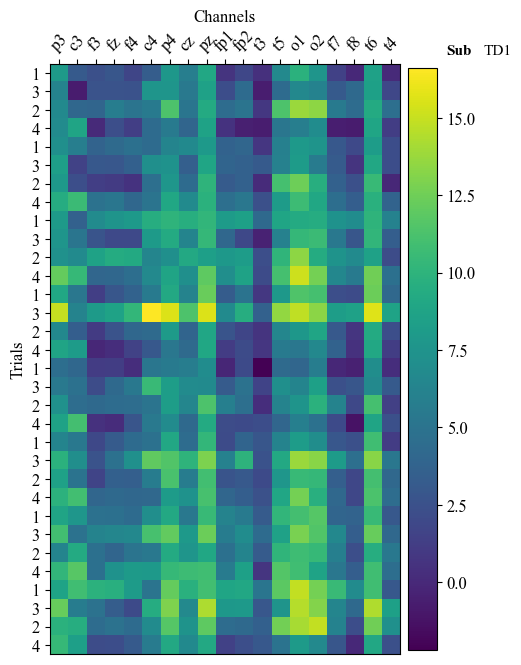

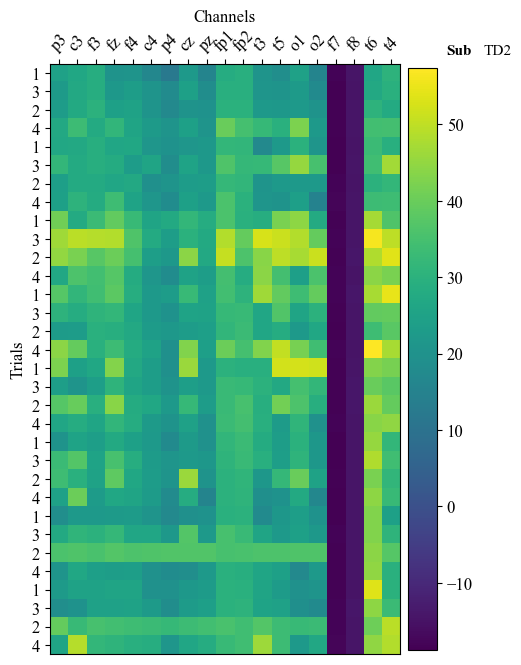

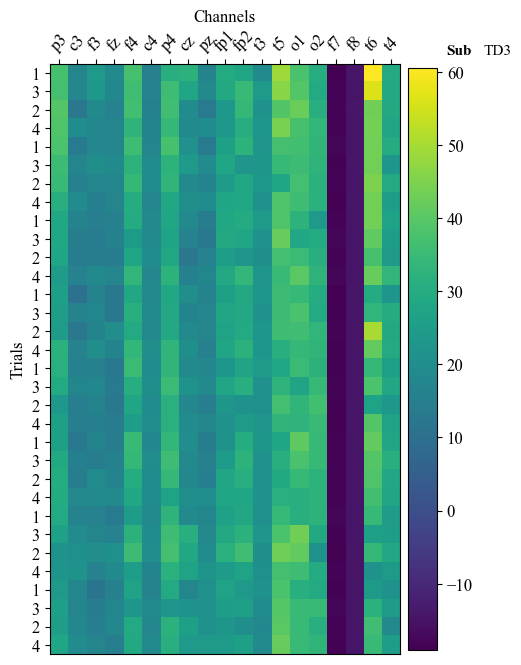

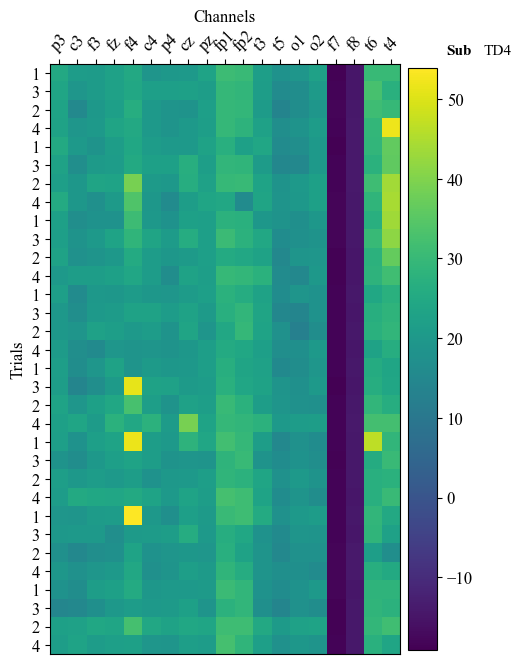

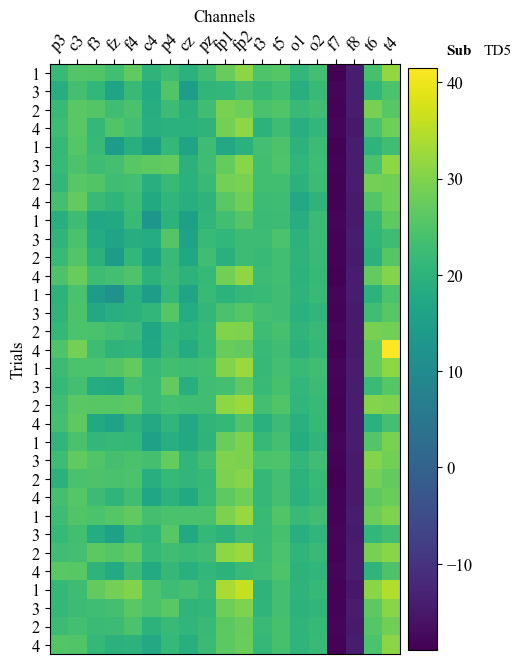

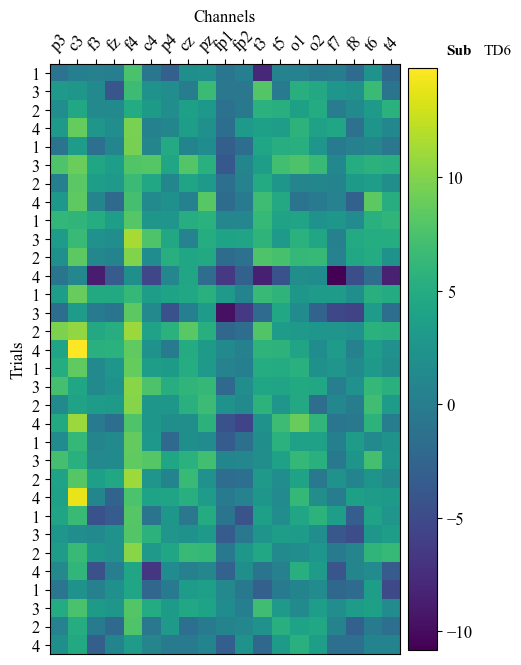

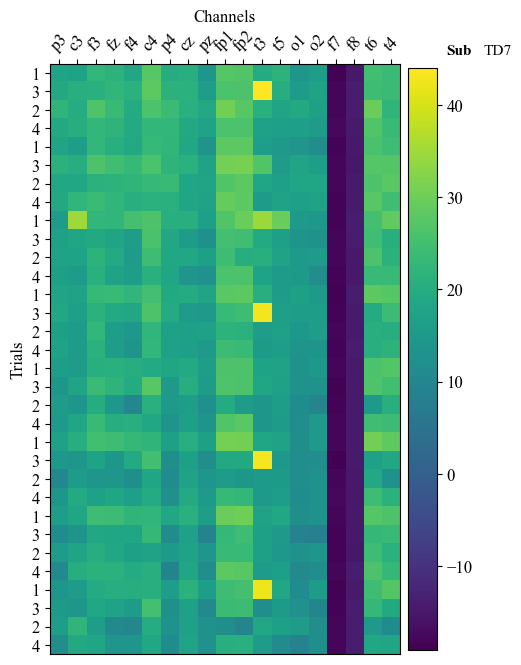

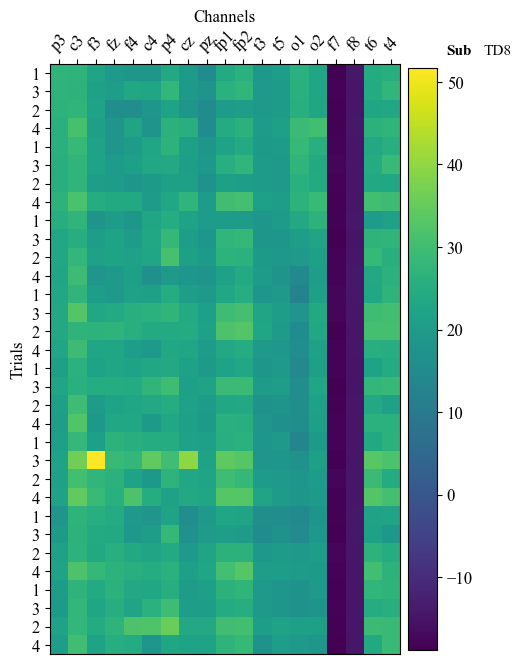

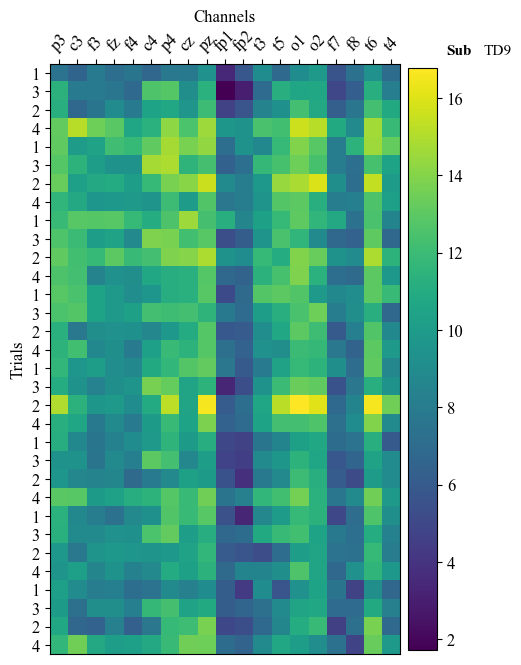

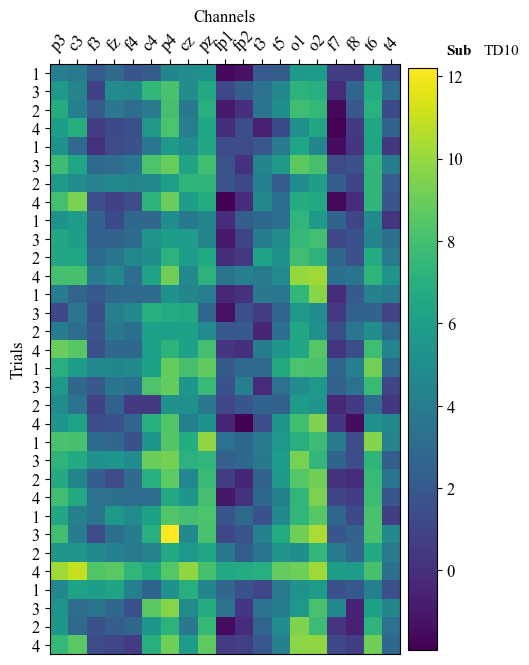

In [413]:
for file_name in file_names: 
    base_name = file_name.split('.')[0]
    mat = scipy.io.loadmat('/mnt/c/Users/scana/Desktop/MI_test/' + file_name)
    psd_alpha = mat['Alpha'][ : , :-1 ]
    labels = mat['Alpha'][:,19]
    labels[3::4] = 4.

    ch_names = mat['ChannelList']
    ch_names = [ch[0].lower() for ch in ch_names[0]]

    left_idx       = np.where(labels == 1)[0]
    right_idx      = np.where(labels == 2)[0]
    left_rest_idx  = np.where(labels == 3)[0]
    right_rest_idx = np.where(labels == 4)[0]

    psd_left       = psd_alpha[ left_idx       ]
    psd_left_rest  = psd_alpha[ left_rest_idx  ]
    psd_right      = psd_alpha[ right_idx      ]
    psd_right_rest = psd_alpha[ right_rest_idx ]
    
    
    
    fig, ax = plt.subplots(figsize=(5,8))
    
    if norm: 
        array_min = psd_alpha.min()
        array_max = psd_alpha.max()
        psd_alpha = (psd_alpha - array_min) / (array_max - array_min)

    cax = ax.imshow(psd_alpha, interpolation='nearest')
    fig.colorbar(cax, fraction=0.075, pad=0.02)

    # Setting the labels for each row and column
    row_labels = [ str(int(x)) for x in labels ]
    col_labels = ch_names
    # Setting the tick marks and labels for x and y axes
    ax.set_xticks(np.arange(len(col_labels)))
    ax.set_xticklabels(col_labels)
    ax.set_yticks(np.arange(len(row_labels)))
    ax.set_yticklabels(row_labels)
    # Moving x-axis ticks and labels to the top
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top') 


    # Rotating the x tick labels so they don't overlap
    plt.xticks(rotation=45)

    # Adding labels for the axes (optional)
    ax.set_xlabel('Channels')
    ax.set_ylabel('Trials')
    ax.text(21, -1, 'Sub', weight='bold', fontsize=11)
    ax.text(23, -1, base_name, fontsize=11)
    
    if norm: 
        plt.savefig(save_path + base_name + '_norm.png', bbox_inches='tight')
    else: 
        plt.savefig(save_path + base_name + '.png', bbox_inches='tight')
    plt.show()

### Convert Giacomo files to visual matrices

In [428]:
file_names = ['sub-HCpeds021_ses-01_task-MotorImag_run-01.npy',
              'sub-HCpeds032_ses-01_task-MotorImag_run-01.npy',
              'sub-HCpeds035_ses-01_task-MotorImag_run-01.npy',
              'sub-HCpeds047_ses-01_task-MotorImag_run-01.npy',
              'sub-HCpeds065_ses-01_task-MotorImag_run-01.npy',
              'sub-HCpeds075_ses-01_task-MotorImag_run-01.npy',
              'sub-HCpeds076_ses-01_task-MotorImag_run-01.npy',
              'sub-HCpeds103_ses-01_task-MotorImag_run-01.npy',
              'sub-HCpeds105_ses-01_task-MotorImag_run-01.npy',
              'sub-HCpeds115_ses-01_task-MotorImag_run-01.npy']
            
norm = False

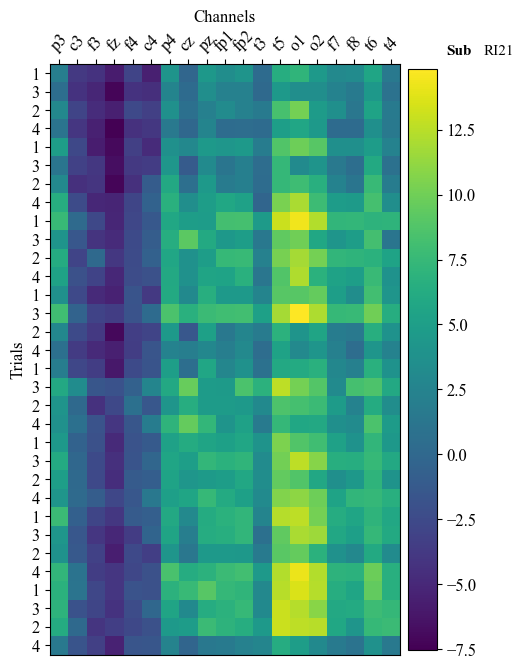

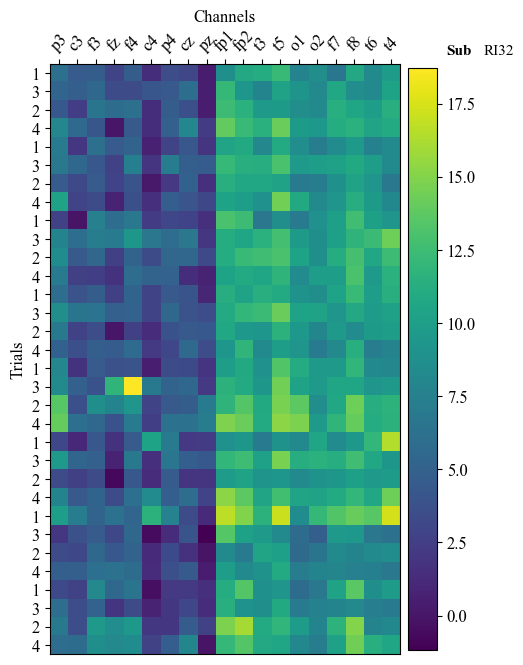

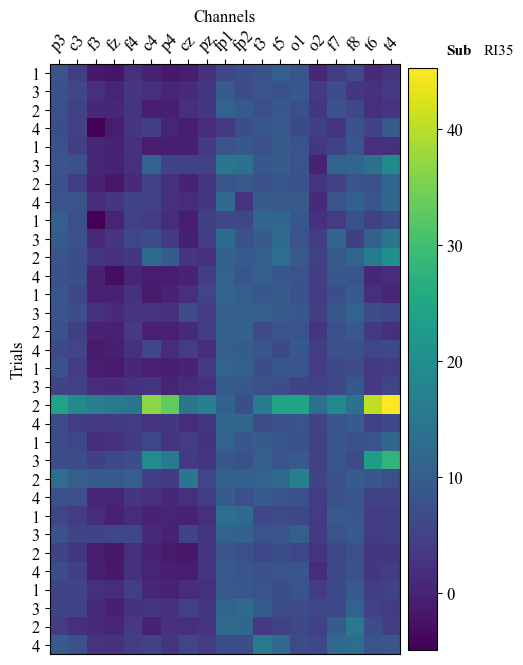

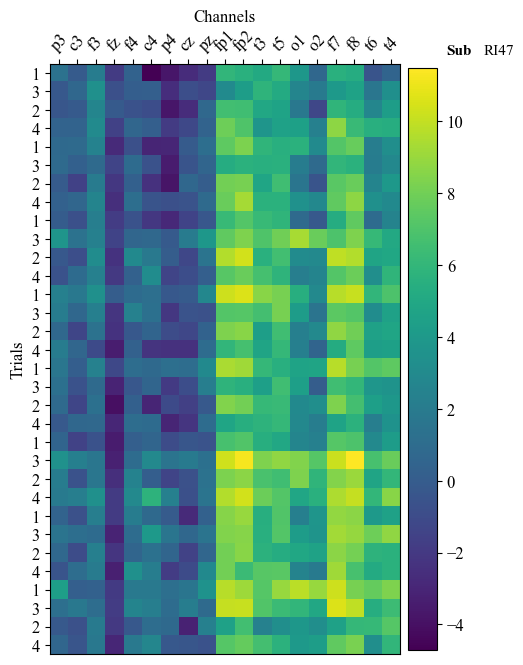

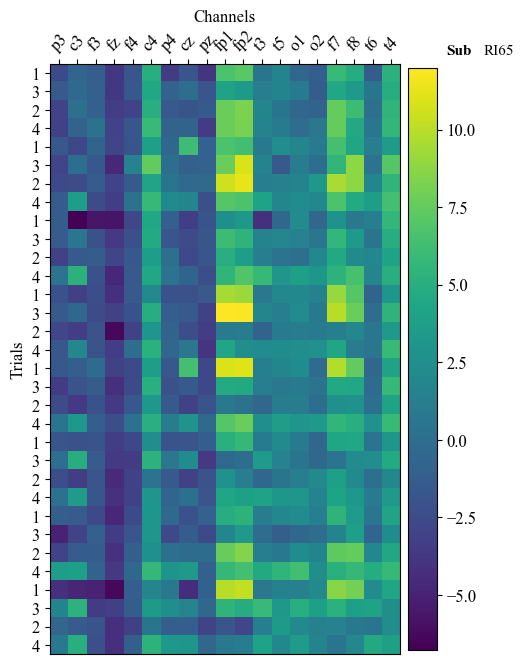

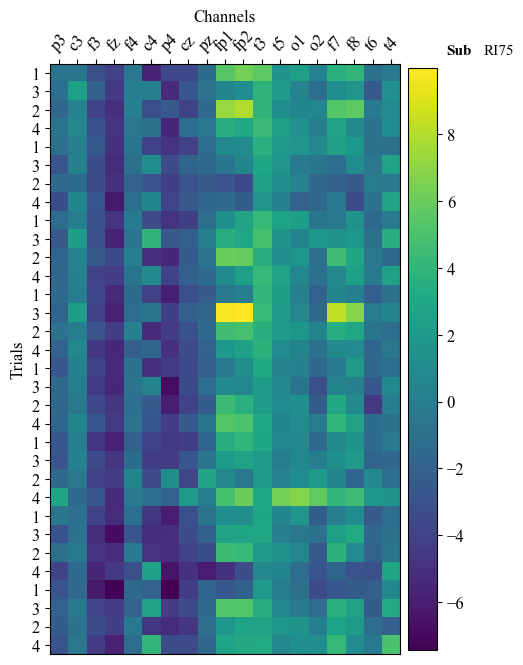

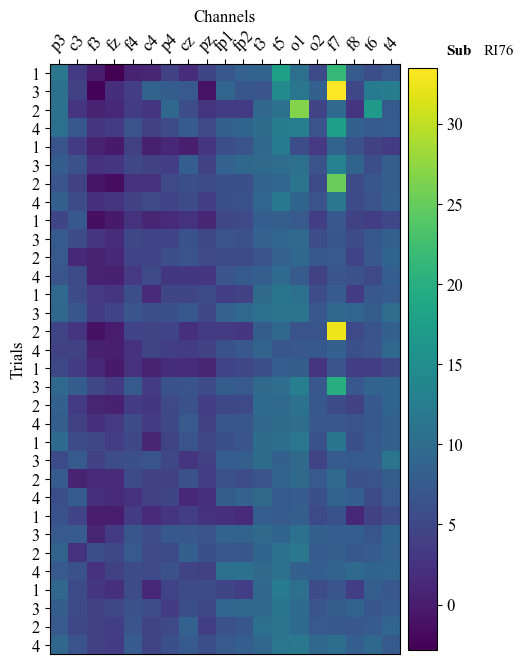

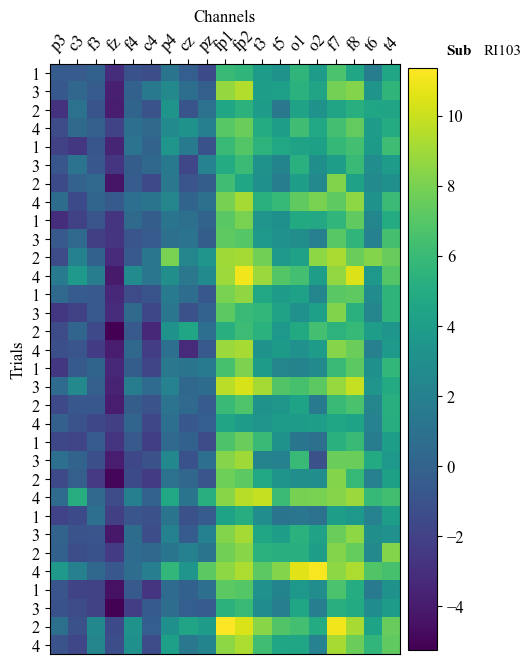

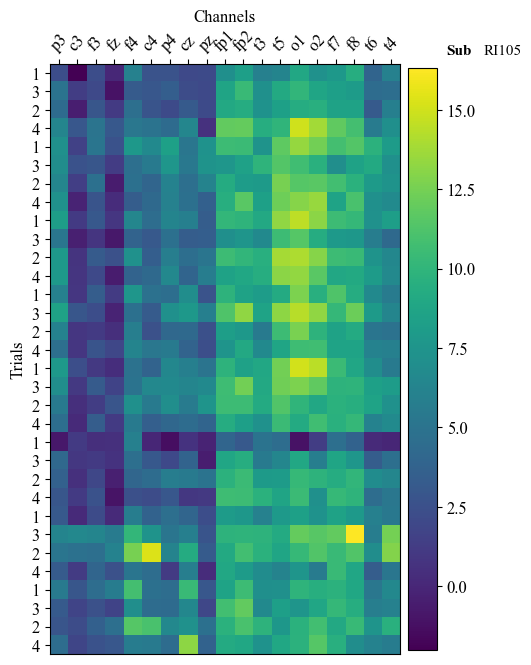

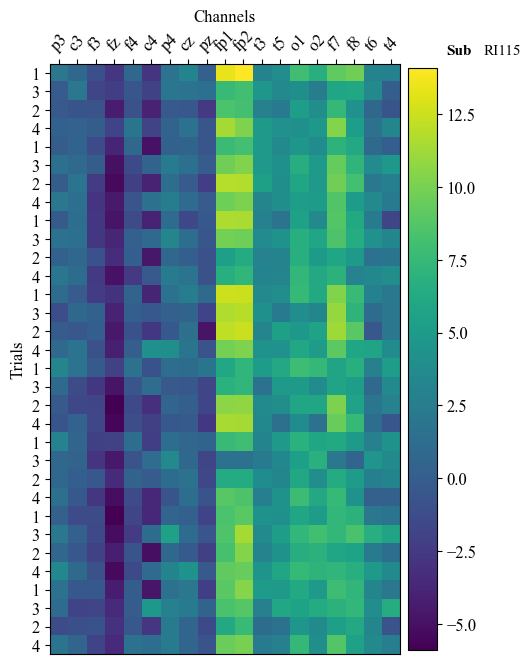

In [415]:
for file_name in file_names: 
    base_name = 'RI'+ file_name.split('-')[1].split('HCpeds')[1]
    psd_alpha = np.load('/mnt/c/Users/scana/Desktop/MI_test/' + file_name)[:,:-1]
    
    
    fig, ax = plt.subplots(figsize=(5,8))
    
    if norm: 
        array_min = psd_alpha.min()
        array_max = psd_alpha.max()
        psd_alpha = (psd_alpha - array_min) / (array_max - array_min)

    cax = ax.imshow(psd_alpha, interpolation='nearest')
    fig.colorbar(cax, fraction=0.075, pad=0.02)

    # Setting the labels for each row and column
    row_labels = [ str(int(x)) for x in labels ]
    col_labels = ch_names
    # Setting the tick marks and labels for x and y axes
    ax.set_xticks(np.arange(len(col_labels)))
    ax.set_xticklabels(col_labels)
    ax.set_yticks(np.arange(len(row_labels)))
    ax.set_yticklabels(row_labels)
    # Moving x-axis ticks and labels to the top
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top') 


    # Rotating the x tick labels so they don't overlap
    plt.xticks(rotation=45)

    # Adding labels for the axes (optional)
    ax.set_xlabel('Channels')
    ax.set_ylabel('Trials')

    ax.text(21, -1, 'Sub', weight='bold', fontsize=11)
    ax.text(23, -1, base_name, fontsize=11)
    if norm: 
        plt.savefig(save_path + base_name + '_norm.png', bbox_inches='tight')
    else: 
        plt.savefig(save_path + base_name + '.png', bbox_inches='tight')
    plt.show()

### Run Nayoung files with Giacomo STAT script

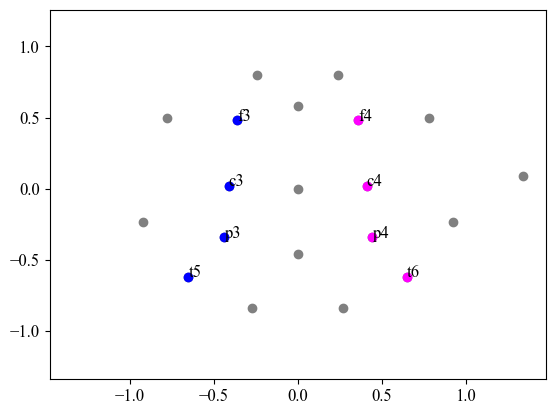

In [446]:
ch_set = ChannelSet('DSI24_location.txt')

# Find all channels on the left and right hemispheres
all_channels = eeg_dict.ch_central + eeg_dict.ch_parietal + eeg_dict.ch_frontal
#all_channels = eeg_dict.ch_face + eeg_dict.ch_frontal+ eeg_dict.ch_central + eeg_dict.ch_parietal + eeg_dict.ch_temporal + eeg_dict.ch_occipital
isLeft_ch =  [x for x in all_channels if x in EEG.find_ch_left(eeg_dict.ch_location)]
isRight_ch = [x for x in all_channels if x in EEG.find_ch_right(eeg_dict.ch_location)]

# Convert ch_set channels into an array of True of False based on the ones to consider 
isLeft =  np.array([True if x in isLeft_ch  else False for x in EEG.low(ch_set.get_labels())])
isRight = np.array([True if x in isRight_ch else False for x in EEG.low(ch_set.get_labels())])

def extend_psds(psds, ch_set, ch):
    # Index where the new column of 0s should be inserted
    index = ch_set.find_labels(ch)[0]  # For example, add the column at index 5
    # Create a column of 0s
    zeros_column = np.zeros((psds_left.shape[0], 1))
    # Correctly insert the column of 0s into the array at the specified index
    new_array = np.insert(psds, index, zeros_column.flatten(), axis=1)
    return new_array

# All channels
PLOT.show_electrode(eeg_dict.ch_location, EEG.low(list(np.array(ch_set.get_labels()))), 
                    label=False, color='grey',   alpha_back=0, marker='o')
# Left channels
PLOT.show_electrode(eeg_dict.ch_location, EEG.low(list(np.array(ch_set.get_labels())[isLeft])), 
                    label=True, color='blue',    alpha_back=0, marker='o')
# Right channels
PLOT.show_electrode(eeg_dict.ch_location, EEG.low(list(np.array(ch_set.get_labels())[isRight])), 
                    label=True, color='magenta', alpha_back=0, marker='o')

In [447]:
p_values = {}

file_names = ['TD1.mat',
              'TD2.mat',
              'TD3.mat',
              'TD4.mat',
              'TD5.mat',
              'TD6.mat',
              'TD7.mat',
              'TD8.mat',
              'TD9.mat',
              'TD10.mat']

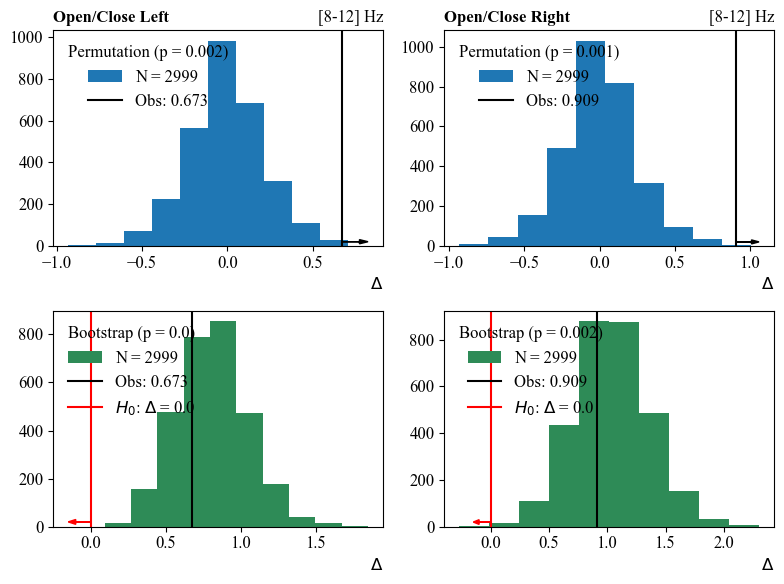

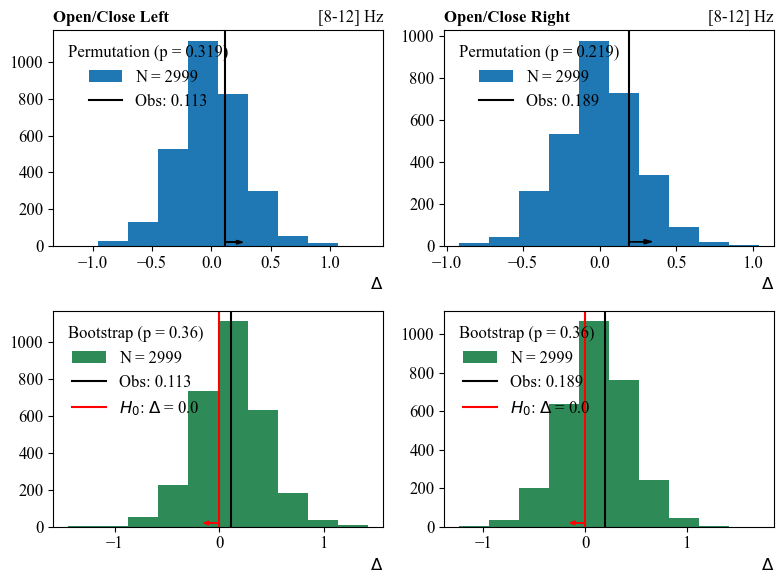

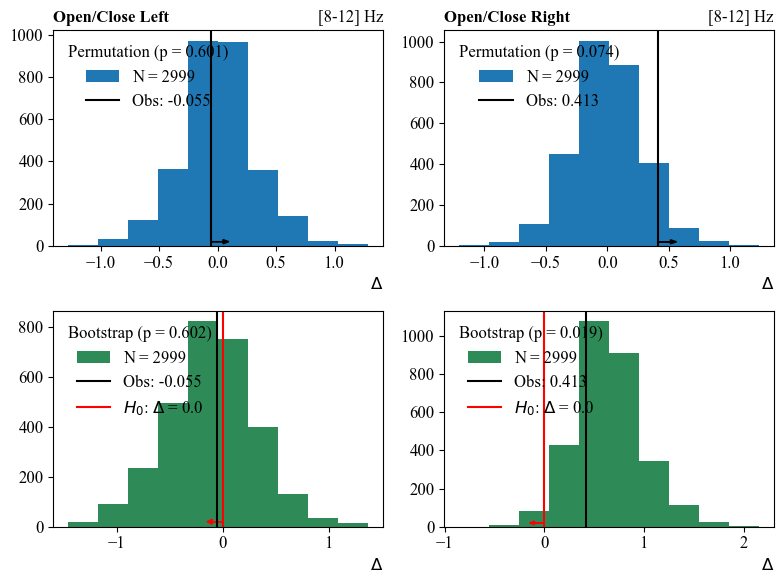

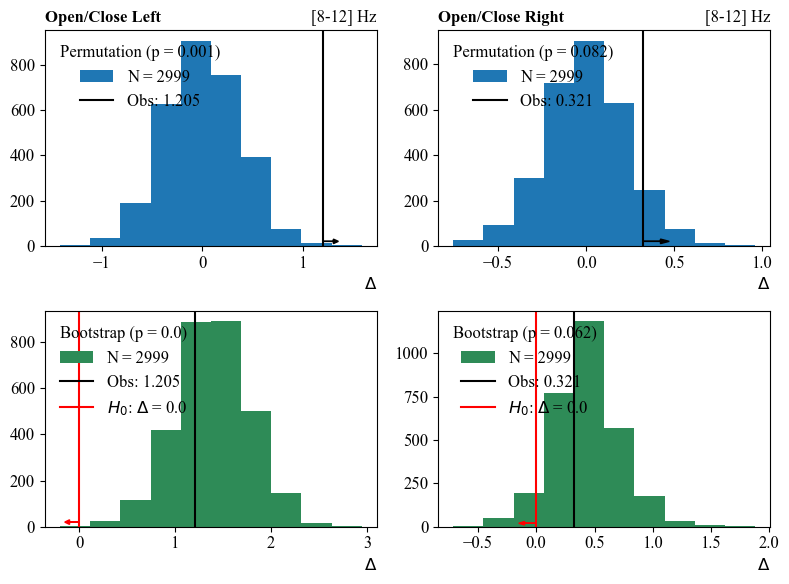

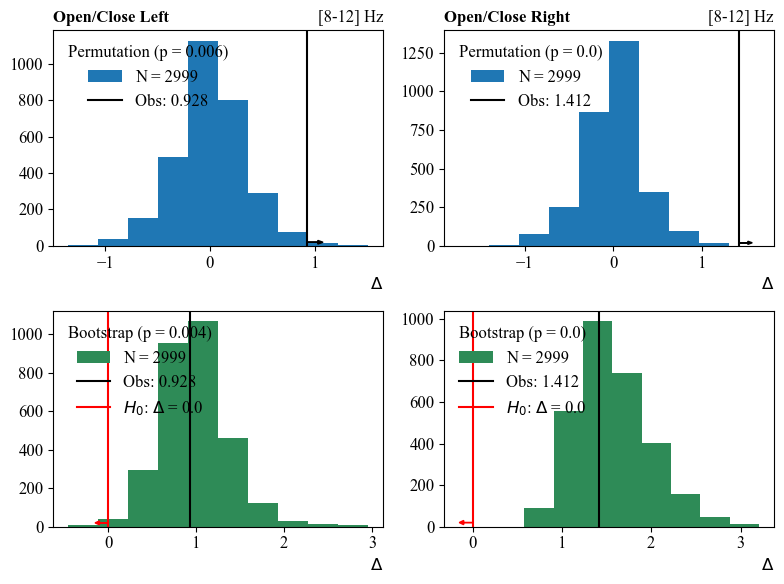

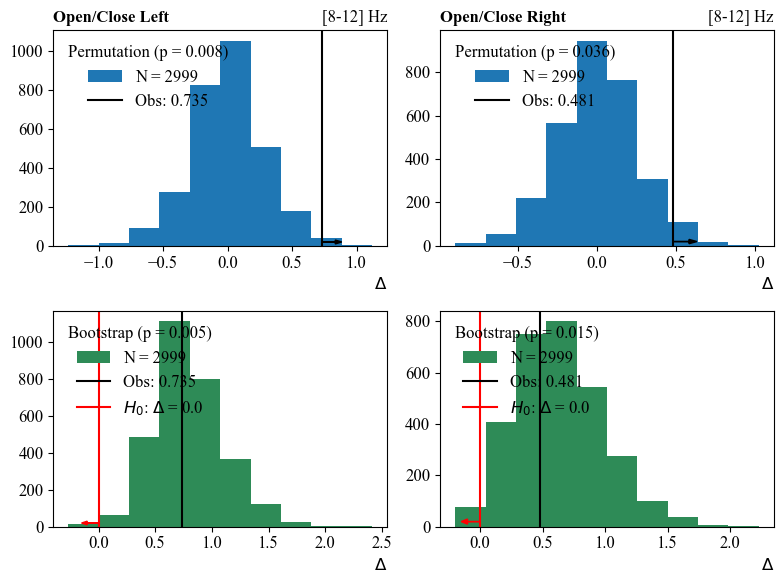

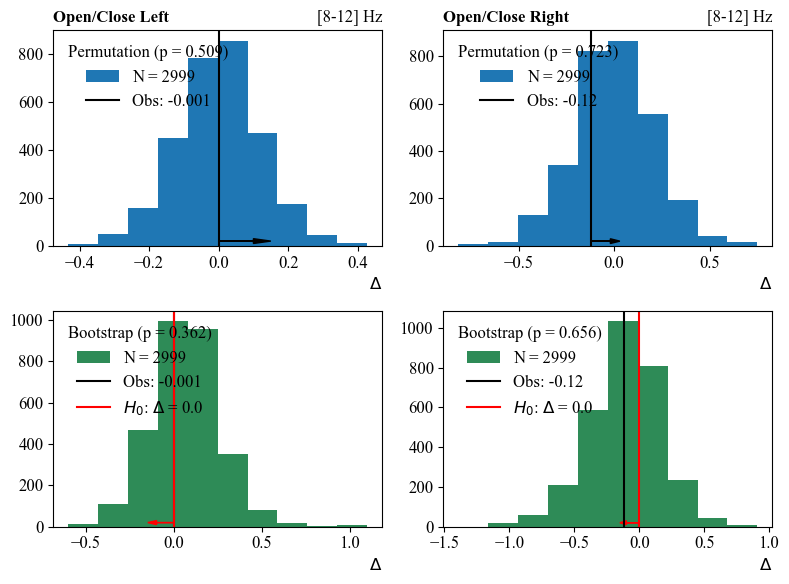

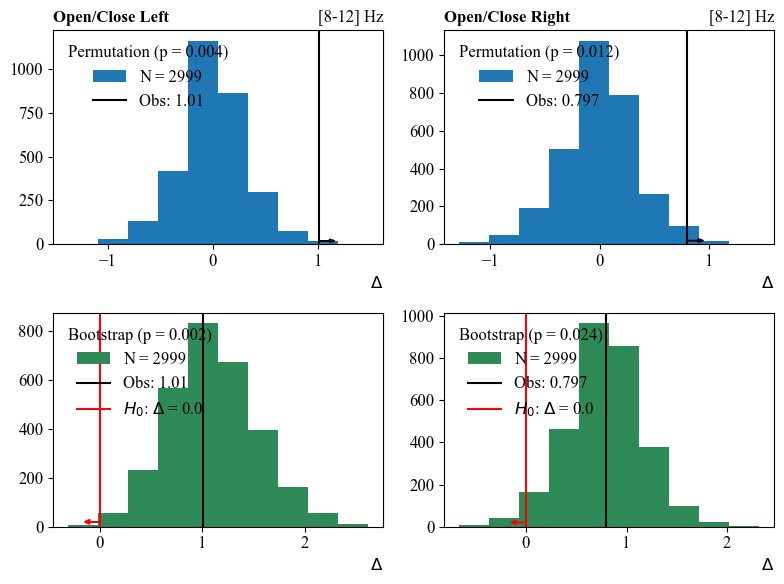

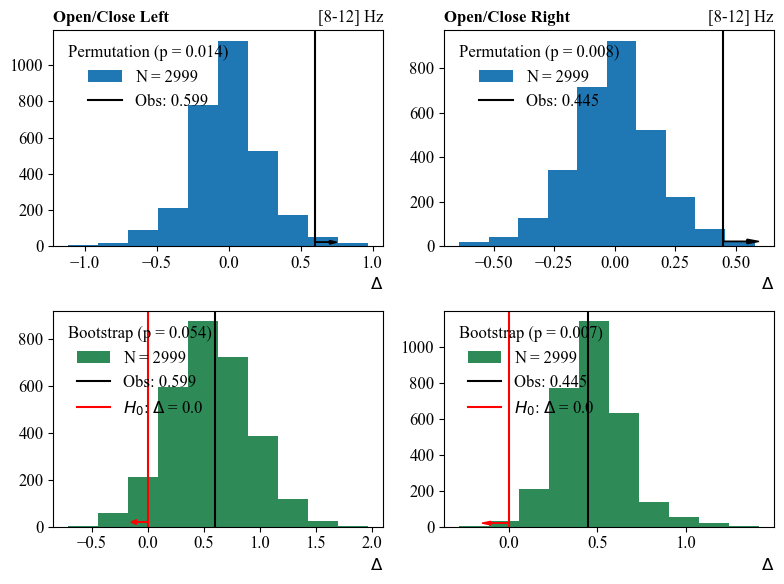

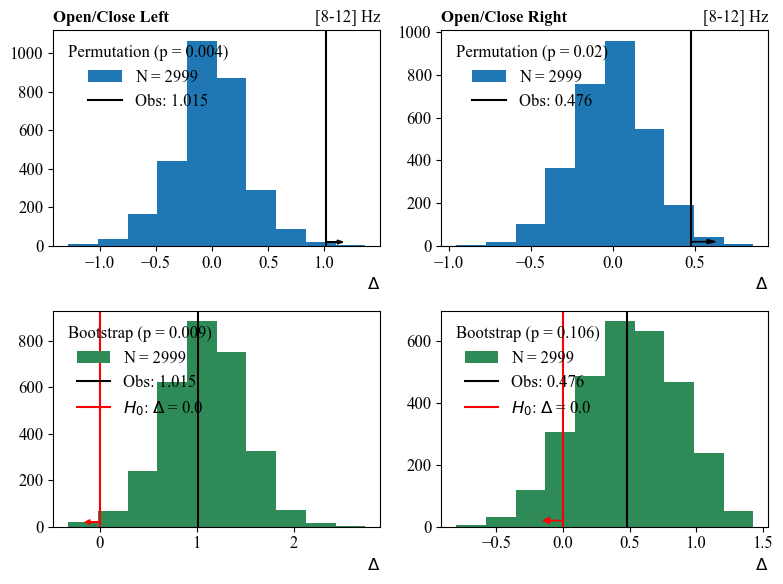

In [448]:
for file_name in file_names:
    base_name = file_name.split('.')[0]
    mat = scipy.io.loadmat('/mnt/c/Users/scana/Desktop/MI_test/' + file_name)
    psd_alpha = mat['Alpha'][ : , :-1 ]
    labels = mat['Alpha'][:,19]
    labels[3::4] = 4.

    ch_names = mat['ChannelList']
    ch_names = [ch[0].lower() for ch in ch_names[0]]

    left_idx       = np.where(labels == 1)[0]
    right_idx      = np.where(labels == 2)[0]
    left_rest_idx  = np.where(labels == 3)[0]
    right_rest_idx = np.where(labels == 4)[0]

    psds_left       = psd_alpha[ left_idx       ]
    psds_left_rest  = psd_alpha[ left_rest_idx  ]
    psds_right      = psd_alpha[ right_idx      ]
    psds_right_rest = psd_alpha[ right_rest_idx ]

    psds_left_       = extend_psds(psds_left,       ch_set, 'a2')
    psds_left_rest_  = extend_psds(psds_left_rest,  ch_set, 'a2')
    psds_right_      = extend_psds(psds_right,      ch_set, 'a2')
    psds_right_rest_ = extend_psds(psds_right_rest, ch_set, 'a2')


    # STAT TESTS
    # Generate frequency bins in each frequency band
    bins_ticks = np.arange(1, 40+1, int(1))
    custom_bins = [8,13]


    # Initialize useful things for the statistical test
    nSim = 2999
    perm_bool = True # Do Permutation test
    boot_bool = True # Do Bootstrap test


    p_left = []
    p_right = []
    labels = []

    # LEFT HAND Statistical Test begins
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(int(4*2),6))
    # Generate array of trials, rest followed by task
    x = np.vstack([psds_left_rest_, psds_left_]) #(trial, ch, bin)
    # Generate labels for rest (True) and task (False)
    isTreatment = np.arange(x.shape[0]) < psds_left_rest_.shape[0] #(trial,)
    isContrast = isRight

    for i in range(len(custom_bins)-1):
        STAT = mi.Stats(ch_set=ch_set, dict_symm=eeg_dict.dict_symm, isContralat=isContrast, bins=bins_ticks, custom_bins=custom_bins)
        if perm_bool:
            if i == 0: axs[0,0].set_title(r'Open/Close Left', fontsize=12,weight='bold', loc='left')
            axs[0,0].set_title(f'[{custom_bins[i]}-{custom_bins[i+1]-1}] Hz', fontsize=12, loc='right')
            p = STAT.ApproxPermutationTest(x=x, isTreatment=isTreatment, stat=STAT.DifferenceOfSumsR2, nSimulations=nSim, plot=True, ax=axs[0,0])
            p_left.append(p)
            labels.append(f'{custom_bins[i]}-{custom_bins[i+1]-1} Hz (P)')
        if boot_bool:
            p = STAT.BootstrapTest(x=x, isTreatment=isTreatment, stat=STAT.DifferenceOfSumsR2, nSimulations=nSim, nullHypothesisStatValue=0.0, plot=True, ax=axs[1,0])
            p_left.append(p)
            labels.append(f'{custom_bins[i]}-{custom_bins[i+1]-1} Hz (B)')

    # RIGHT HAND Statistical Test begins
    # Generate array of trials, rest followed by task
    x = np.vstack([psds_right_rest_, psds_right_]) #(trial, ch, bin)
    # Generate labels for rest (True) and task (False)
    isTreatment = np.arange(x.shape[0]) < psds_right_rest_.shape[0] #(trial,)
    isContrast = isLeft

    for i in range(len(custom_bins)-1):
        STAT = mi.Stats(ch_set=ch_set, dict_symm=eeg_dict.dict_symm, isContralat=isContrast, bins=bins_ticks, custom_bins=custom_bins)
        if perm_bool:
            if i == 0: axs[0,1].set_title(r'Open/Close Right', fontsize=12,weight='bold', loc='left')
            axs[0,1].set_title(f'[{custom_bins[i]}-{custom_bins[i+1]-1}] Hz', fontsize=12, loc='right')
            p = STAT.ApproxPermutationTest(x=x, isTreatment=isTreatment, stat=STAT.DifferenceOfSumsR2, nSimulations=nSim, plot=True, ax=axs[0,1])
            p_right.append(p)
        if boot_bool:
            p = STAT.BootstrapTest(x=x, isTreatment=isTreatment, stat=STAT.DifferenceOfSumsR2, nSimulations=nSim, nullHypothesisStatValue=0.0, plot=True, ax=axs[1,1])
            p_right.append(p)
    plt.tight_layout()
    plt.show()


    p_values[f'{base_name}'+'_p'] = [p_left[0], p_right[0]]
    p_values[f'{base_name}'+'_b'] = [p_left[1], p_right[1]]

In [449]:
p_values

{'TD1_p': [0.0018333333333333333, 0.0008333333333333334],
 'TD1_b': [0.00016666666666666666, 0.0015],
 'TD2_p': [0.31916666666666665, 0.21883333333333332],
 'TD2_b': [0.3595, 0.3595],
 'TD3_p': [0.6008333333333333, 0.07383333333333333],
 'TD3_b': [0.6015, 0.019166666666666665],
 'TD4_p': [0.0008333333333333334, 0.0825],
 'TD4_b': [0.0005, 0.0615],
 'TD5_p': [0.006166666666666667, 0.0005],
 'TD5_b': [0.003833333333333333, 0.0005],
 'TD6_p': [0.008166666666666666, 0.0365],
 'TD6_b': [0.004833333333333334, 0.015166666666666667],
 'TD7_p': [0.5091666666666667, 0.7231666666666666],
 'TD7_b': [0.3615, 0.6565],
 'TD8_p': [0.003833333333333333, 0.011833333333333333],
 'TD8_b': [0.0025, 0.0245],
 'TD9_p': [0.014166666666666666, 0.0075],
 'TD9_b': [0.0535, 0.006833333333333334],
 'TD10_p': [0.0035, 0.020166666666666666],
 'TD10_b': [0.008833333333333334, 0.10583333333333333]}

In [450]:
labels = []
for file_name in file_names:
    labels.append(file_name.split('.')[0])

In [451]:
p_left = []
p_right = []
for i,(key, value) in enumerate(p_values.items()):
    if i%2 == 0: 
        p_left.append(value[0])
        p_right.append(value[1])

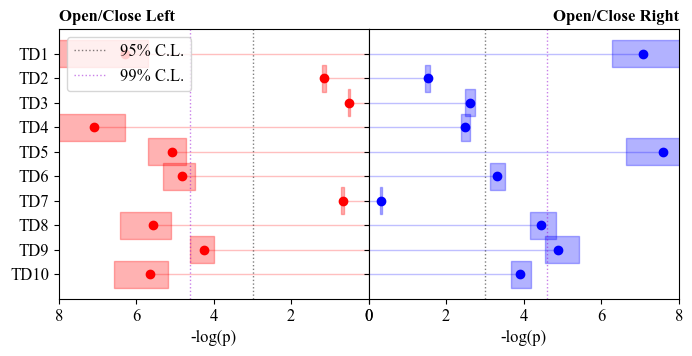

In [452]:
# Plot p-values extracted by Statistical tests
# This is a Left - Right view
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3.5), sharey=True)
y_max = 0.5
y_min = -0.5
y = np.linspace(start=y_max, stop=y_min, num=len(p_left)+2)
y = y[1:-1]
deltay = 0.05
# Left results
#---------
x_values = []
xUp_values = []
xDown_values = []
for p in p_left:
    p_down, p, p_up = STAT.pvalue_interval(p, nSim+1)
    xUp_values.append(STAT.negP(p_up))
    x_values.append(STAT.negP(p))
    xDown_values.append(STAT.negP(p_down))
#---------
ax1.set_title('Open/Close Left', fontsize=12, loc='left', weight='bold')
ax1.scatter(x_values, y, color='red', marker='o')
# Add confidence interval on true p
for i in range(len(y)):
    ax1.fill_betweenx([y[i]-deltay, y[i]+deltay], xDown_values[i], xUp_values[i], color='red', alpha=0.3)
ax1.hlines(y, 0, x_values, colors='red', lw=1, alpha=0.25)
ax1.set_xlabel(r'-log(p)')
ax1.set_xlim(ax1.get_xlim()[::-1])  # Reverse the x-axis for left plot
ax1.set_xlim(right=0, left=8)
ax1.set_ylim(y_min, y_max)
ax1.axvline(STAT.negP(0.05), color='black', lw=1, ls=':', alpha=0.5, label='95% C.L.')
ax1.axvline(STAT.negP(0.01), color='darkviolet', lw=1, ls=':', alpha=0.5, label='99% C.L.')
ax1.set_yticks(y)
ax1.set_yticklabels(labels)
ax1.legend(loc='upper left')
# Right results
#---------
x_values = []
xUp_values = []
xDown_values = []
for p in p_right:
    p_down, p, p_up = STAT.pvalue_interval(p, nSim+1)
    xUp_values.append(STAT.negP(p_up))
    x_values.append(STAT.negP(p))
    xDown_values.append(STAT.negP(p_down))
#---------
ax2.set_title('Open/Close Right', fontsize=12, loc='right', weight='bold')
ax2.scatter(x_values, y, color='blue', marker='o')
# Add confidence interval on true p
for i in range(len(y)):
    ax2.fill_betweenx([y[i]-deltay, y[i]+deltay], xDown_values[i], xUp_values[i], color='blue', alpha=0.3)
ax2.hlines(y, 0, x_values, colors='blue', lw=1, alpha=0.25)
ax2.set_xlabel(r'-log(p)')
ax2.set_xlim(left=0, right=8)
ax1.set_ylim(y_min, y_max)
ax2.axvline(STAT.negP(0.05), color='black', lw=1, ls=':', alpha=0.5)
ax2.axvline(STAT.negP(0.01), color='darkviolet', lw=1, ls=':', alpha=0.5)
#--------- 
plt.subplots_adjust(wspace=0)  # Adjust space between subplots
plt.show()

### Run Giacomo files with Giacomo STAT script

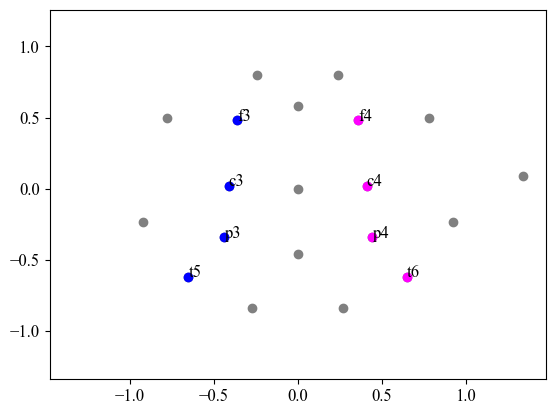

In [453]:
ch_set = ChannelSet('DSI24_location.txt')

# Find all channels on the left and right hemispheres
all_channels = eeg_dict.ch_central + eeg_dict.ch_parietal + eeg_dict.ch_frontal
#all_channels = eeg_dict.ch_face + eeg_dict.ch_frontal+ eeg_dict.ch_central + eeg_dict.ch_parietal + eeg_dict.ch_temporal + eeg_dict.ch_occipital
isLeft_ch =  [x for x in all_channels if x in EEG.find_ch_left(eeg_dict.ch_location)]
isRight_ch = [x for x in all_channels if x in EEG.find_ch_right(eeg_dict.ch_location)]

# Convert ch_set channels into an array of True of False based on the ones to consider 
isLeft =  np.array([True if x in isLeft_ch  else False for x in EEG.low(ch_set.get_labels())])
isRight = np.array([True if x in isRight_ch else False for x in EEG.low(ch_set.get_labels())])

def extend_psds(psds, ch_set, ch):
    # Index where the new column of 0s should be inserted
    index = ch_set.find_labels(ch)[0]  # For example, add the column at index 5
    # Create a column of 0s
    zeros_column = np.zeros((psds_left.shape[0], 1))
    # Correctly insert the column of 0s into the array at the specified index
    new_array = np.insert(psds, index, zeros_column.flatten(), axis=1)
    return new_array

# All channels
PLOT.show_electrode(eeg_dict.ch_location, EEG.low(list(np.array(ch_set.get_labels()))), 
                    label=False, color='grey',   alpha_back=0, marker='o')
# Left channels
PLOT.show_electrode(eeg_dict.ch_location, EEG.low(list(np.array(ch_set.get_labels())[isLeft])), 
                    label=True, color='blue',    alpha_back=0, marker='o')
# Right channels
PLOT.show_electrode(eeg_dict.ch_location, EEG.low(list(np.array(ch_set.get_labels())[isRight])), 
                    label=True, color='magenta', alpha_back=0, marker='o')

In [487]:
p_values = {}

file_name = 'CS05-MotorImagery-S001R02_aggregate_first.npy'
base_name, extension = os.path.splitext(file_name)
sub_name = base_name.split('-')[0]
ses_name = base_name.split('-')[2].split('S0')[1].split('R')[0]

In [488]:
psd_alpha = np.load('/mnt/c/Users/scana/Desktop/MI_test/' + file_name)[:,:-1]
labels = np.load('/mnt/c/Users/scana/Desktop/MI_test/' + file_name)[:,-1]
labels[3::4] = 4.

In [489]:
left_idx       = np.where(labels == 1)[0]
right_idx      = np.where(labels == 2)[0]
left_rest_idx  = np.where(labels == 3)[0]
right_rest_idx = np.where(labels == 4)[0]

psds_left       = psd_alpha[ left_idx       ]
psds_left_rest  = psd_alpha[ left_rest_idx  ]
psds_right      = psd_alpha[ right_idx      ]
psds_right_rest = psd_alpha[ right_rest_idx ]

psds_left_       = extend_psds(psds_left,       ch_set, 'a2')
psds_left_rest_  = extend_psds(psds_left_rest,  ch_set, 'a2')
psds_right_      = extend_psds(psds_right,      ch_set, 'a2')
psds_right_rest_ = extend_psds(psds_right_rest, ch_set, 'a2')

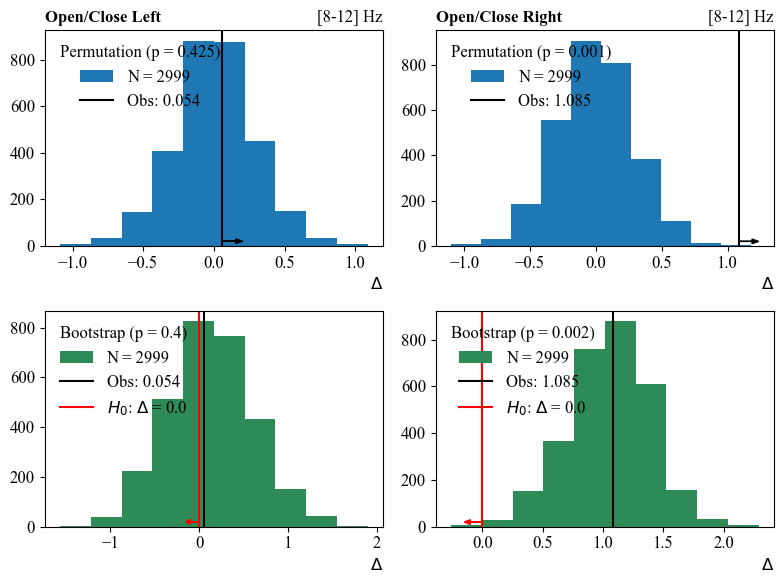

In [490]:
# STAT TESTS
# Generate frequency bins in each frequency band
bins_ticks = np.arange(1, 40+1, int(1))
custom_bins = [8,13]


# Initialize useful things for the statistical test
nSim = 2999
perm_bool = True # Do Permutation test
boot_bool = True # Do Bootstrap test


p_left = []
p_right = []
labels = []

# LEFT HAND Statistical Test begins
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(int(4*2),6))
# Generate array of trials, rest followed by task
x = np.vstack([psds_left_rest_, psds_left_]) #(trial, ch, bin)
# Generate labels for rest (True) and task (False)
isTreatment = np.arange(x.shape[0]) < psds_left_rest_.shape[0] #(trial,)
isContrast = isRight

for i in range(len(custom_bins)-1):
    STAT = mi.Stats(ch_set=ch_set, dict_symm=eeg_dict.dict_symm, isContralat=isContrast, bins=bins_ticks, custom_bins=custom_bins)
    if perm_bool:
        if i == 0: axs[0,0].set_title(r'Open/Close Left', fontsize=12,weight='bold', loc='left')
        axs[0,0].set_title(f'[{custom_bins[i]}-{custom_bins[i+1]-1}] Hz', fontsize=12, loc='right')
        p = STAT.ApproxPermutationTest(x=x, isTreatment=isTreatment, stat=STAT.DifferenceOfSumsR2, nSimulations=nSim, plot=True, ax=axs[0,0])
        p_left.append(p)
        labels.append(f'{custom_bins[i]}-{custom_bins[i+1]-1} Hz (P)')
    if boot_bool:
        p = STAT.BootstrapTest(x=x, isTreatment=isTreatment, stat=STAT.DifferenceOfSumsR2, nSimulations=nSim, nullHypothesisStatValue=0.0, plot=True, ax=axs[1,0])
        p_left.append(p)
        labels.append(f'{custom_bins[i]}-{custom_bins[i+1]-1} Hz (B)')

# RIGHT HAND Statistical Test begins
# Generate array of trials, rest followed by task
x = np.vstack([psds_right_rest_, psds_right_]) #(trial, ch, bin)
# Generate labels for rest (True) and task (False)
isTreatment = np.arange(x.shape[0]) < psds_right_rest_.shape[0] #(trial,)
isContrast = isLeft

for i in range(len(custom_bins)-1):
    STAT = mi.Stats(ch_set=ch_set, dict_symm=eeg_dict.dict_symm, isContralat=isContrast, bins=bins_ticks, custom_bins=custom_bins)
    if perm_bool:
        if i == 0: axs[0,1].set_title(r'Open/Close Right', fontsize=12,weight='bold', loc='left')
        axs[0,1].set_title(f'[{custom_bins[i]}-{custom_bins[i+1]-1}] Hz', fontsize=12, loc='right')
        p = STAT.ApproxPermutationTest(x=x, isTreatment=isTreatment, stat=STAT.DifferenceOfSumsR2, nSimulations=nSim, plot=True, ax=axs[0,1])
        p_right.append(p)
    if boot_bool:
        p = STAT.BootstrapTest(x=x, isTreatment=isTreatment, stat=STAT.DifferenceOfSumsR2, nSimulations=nSim, nullHypothesisStatValue=0.0, plot=True, ax=axs[1,1])
        p_right.append(p)
plt.tight_layout()
plt.show()


p_values[f'{sub_name}'+'_p'] = [p_left[0], p_right[0]]
p_values[f'{sub_name}'+'_b'] = [p_left[1], p_right[1]]

In [491]:
p_values

{'CS05_p': [0.42483333333333334, 0.0011666666666666668],
 'CS05_b': [0.4005, 0.0021666666666666666]}

In [480]:
p_left = []
p_right = []
for i,(key, value) in enumerate(p_values.items()):
    if i%2 == 0: 
        p_left.append(value[0])
        p_right.append(value[1])

ValueError: The number of FixedLocator locations (1), usually from a call to set_ticks, does not match the number of labels (2).

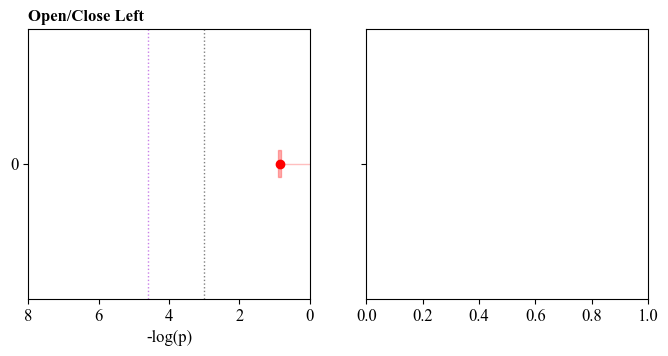

In [481]:
# Plot p-values extracted by Statistical tests
# This is a Left - Right view
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3.5), sharey=True)
y_max = 0.5
y_min = -0.5
y = np.linspace(start=y_max, stop=y_min, num=len(p_left)+2)
y = y[1:-1]
deltay = 0.05
# Left results
#---------
x_values = []
xUp_values = []
xDown_values = []
for p in p_left:
    p_down, p, p_up = STAT.pvalue_interval(p, nSim+1)
    xUp_values.append(STAT.negP(p_up))
    x_values.append(STAT.negP(p))
    xDown_values.append(STAT.negP(p_down))
#---------
ax1.set_title('Open/Close Left', fontsize=12, loc='left', weight='bold')
ax1.scatter(x_values, y, color='red', marker='o')
# Add confidence interval on true p
for i in range(len(y)):
    ax1.fill_betweenx([y[i]-deltay, y[i]+deltay], xDown_values[i], xUp_values[i], color='red', alpha=0.3)
ax1.hlines(y, 0, x_values, colors='red', lw=1, alpha=0.25)
ax1.set_xlabel(r'-log(p)')
ax1.set_xlim(ax1.get_xlim()[::-1])  # Reverse the x-axis for left plot
ax1.set_xlim(right=0, left=8)
ax1.set_ylim(y_min, y_max)
ax1.axvline(STAT.negP(0.05), color='black', lw=1, ls=':', alpha=0.5, label='95% C.L.')
ax1.axvline(STAT.negP(0.01), color='darkviolet', lw=1, ls=':', alpha=0.5, label='99% C.L.')
ax1.set_yticks(y)
ax1.set_yticklabels(labels)
ax1.legend(loc='upper left')
# Right results
#---------
x_values = []
xUp_values = []
xDown_values = []
for p in p_right:
    p_down, p, p_up = STAT.pvalue_interval(p, nSim+1)
    xUp_values.append(STAT.negP(p_up))
    x_values.append(STAT.negP(p))
    xDown_values.append(STAT.negP(p_down))
#---------
ax2.set_title('Open/Close Right', fontsize=12, loc='right', weight='bold')
ax2.scatter(x_values, y, color='blue', marker='o')
# Add confidence interval on true p
for i in range(len(y)):
    ax2.fill_betweenx([y[i]-deltay, y[i]+deltay], xDown_values[i], xUp_values[i], color='blue', alpha=0.3)
ax2.hlines(y, 0, x_values, colors='blue', lw=1, alpha=0.25)
ax2.set_xlabel(r'-log(p)')
ax2.set_xlim(left=0, right=8)
ax1.set_ylim(y_min, y_max)
ax2.axvline(STAT.negP(0.05), color='black', lw=1, ls=':', alpha=0.5)
ax2.axvline(STAT.negP(0.01), color='darkviolet', lw=1, ls=':', alpha=0.5)
#--------- 
plt.subplots_adjust(wspace=0)  # Adjust space between subplots
plt.show()

### Paper results 

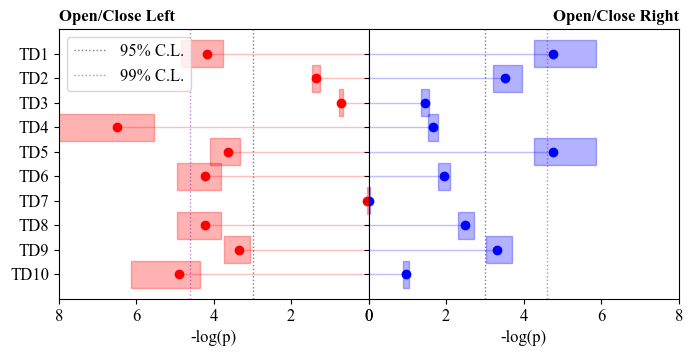

In [426]:
paper_result = {'TD1'    : [0.0155, 0.0085],
                'TD2'    : [0.2585, 0.0295],
                'TD3'    : [0.4905, 0.2365],
                'TD4'    : [0.0015, 0.1905],
                'TD5'    : [0.0265, 0.0085],
                'TD6'    : [0.0145, 0.1445],
                'TD7'    : [0.9645, 0.9825],
                'TD8'    : [0.0145, 0.0825],
                'TD9'    : [0.0355, 0.0365],
                'TD10'   : [0.0075, 0.3795]}

p_left = [value[0] for key, value in paper_result.items()]
p_right = [value[1] for key, value in paper_result.items()]
labels = [x for x in paper_result.keys()]

nSim = 1000

# Plot p-values extracted by Statistical tests
# This is a Left - Right view
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3.5), sharey=True)
y_max = 0.5
y_min = -0.5
y = np.linspace(start=y_max, stop=y_min, num=len(p_left)+2)
y = y[1:-1]
deltay = 0.05
# Left results
#---------
x_values = []
xUp_values = []
xDown_values = []
for p in p_left:
    p_down, p, p_up = STAT.pvalue_interval(p, nSim+1)
    xUp_values.append(STAT.negP(p_up))
    x_values.append(STAT.negP(p))
    xDown_values.append(STAT.negP(p_down))
#---------
ax1.set_title('Open/Close Left', fontsize=12, loc='left', weight='bold')
ax1.scatter(x_values, y, color='red', marker='o')
# Add confidence interval on true p
for i in range(len(y)):
    ax1.fill_betweenx([y[i]-deltay, y[i]+deltay], xDown_values[i], xUp_values[i], color='red', alpha=0.3)
ax1.hlines(y, 0, x_values, colors='red', lw=1, alpha=0.25)
ax1.set_xlabel(r'-log(p)')
ax1.set_xlim(ax1.get_xlim()[::-1])  # Reverse the x-axis for left plot
ax1.set_xlim(right=0, left=8)
ax1.set_ylim(y_min, y_max)
ax1.axvline(STAT.negP(0.05), color='black', lw=1, ls=':', alpha=0.5, label='95% C.L.')
ax1.axvline(STAT.negP(0.01), color='darkviolet', lw=1, ls=':', alpha=0.5, label='99% C.L.')
ax1.set_yticks(y)
ax1.set_yticklabels(labels)
ax1.legend(loc='upper left')
# Right results
#---------
x_values = []
xUp_values = []
xDown_values = []
for p in p_right:
    p_down, p, p_up = STAT.pvalue_interval(p, nSim+1)
    xUp_values.append(STAT.negP(p_up))
    x_values.append(STAT.negP(p))
    xDown_values.append(STAT.negP(p_down))
#---------
ax2.set_title('Open/Close Right', fontsize=12, loc='right', weight='bold')
ax2.scatter(x_values, y, color='blue', marker='o')
# Add confidence interval on true p
for i in range(len(y)):
    ax2.fill_betweenx([y[i]-deltay, y[i]+deltay], xDown_values[i], xUp_values[i], color='blue', alpha=0.3)
ax2.hlines(y, 0, x_values, colors='blue', lw=1, alpha=0.25)
ax2.set_xlabel(r'-log(p)')
ax2.set_xlim(left=0, right=8)
ax1.set_ylim(y_min, y_max)
ax2.axvline(STAT.negP(0.05), color='black', lw=1, ls=':', alpha=0.5)
ax2.axvline(STAT.negP(0.01), color='darkviolet', lw=1, ls=':', alpha=0.5)
#--------- 
plt.subplots_adjust(wspace=0)  # Adjust space between subplots
plt.show()

### Giacomo files with Giacomo STAT script

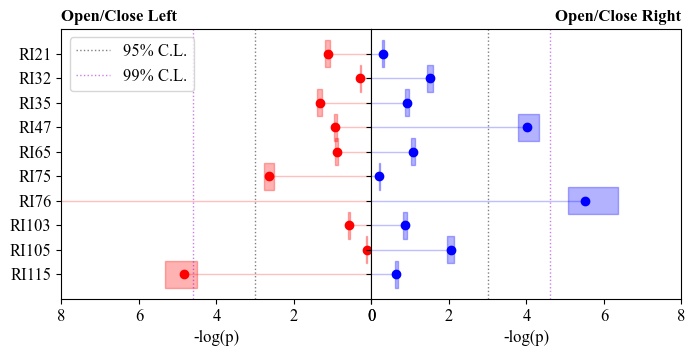

In [427]:
paper_result = {'RI21'    : [0.322, 0.742],
                'RI32'    : [0.750, 0.221],
                'RI35'    : [0.262, 0.402],
                'RI47'    : [0.394, 0.018],
                'RI65'    : [0.407, 0.342],
                'RI75'    : [0.071, 0.820],
                'RI76'    : [0.000, 0.004],
                'RI103'   : [0.560, 0.420],
                'RI105'   : [0.882, 0.130],
                'RI115'   : [0.008, 0.528]}

p_left = [value[0] for key, value in paper_result.items()]
p_right = [value[1] for key, value in paper_result.items()]
labels = [x for x in paper_result.keys()]

nSim = 3000

# Plot p-values extracted by Statistical tests
# This is a Left - Right view
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3.5), sharey=True)
y_max = 0.5
y_min = -0.5
y = np.linspace(start=y_max, stop=y_min, num=len(p_left)+2)
y = y[1:-1]
deltay = 0.05
# Left results
#---------
x_values = []
xUp_values = []
xDown_values = []
for p in p_left:
    p_down, p, p_up = STAT.pvalue_interval(p, nSim+1)
    xUp_values.append(STAT.negP(p_up))
    x_values.append(STAT.negP(p))
    xDown_values.append(STAT.negP(p_down))
#---------
ax1.set_title('Open/Close Left', fontsize=12, loc='left', weight='bold')
ax1.scatter(x_values, y, color='red', marker='o')
# Add confidence interval on true p
for i in range(len(y)):
    ax1.fill_betweenx([y[i]-deltay, y[i]+deltay], xDown_values[i], xUp_values[i], color='red', alpha=0.3)
ax1.hlines(y, 0, x_values, colors='red', lw=1, alpha=0.25)
ax1.set_xlabel(r'-log(p)')
ax1.set_xlim(ax1.get_xlim()[::-1])  # Reverse the x-axis for left plot
ax1.set_xlim(right=0, left=8)
ax1.set_ylim(y_min, y_max)
ax1.axvline(STAT.negP(0.05), color='black', lw=1, ls=':', alpha=0.5, label='95% C.L.')
ax1.axvline(STAT.negP(0.01), color='darkviolet', lw=1, ls=':', alpha=0.5, label='99% C.L.')
ax1.set_yticks(y)
ax1.set_yticklabels(labels)
ax1.legend(loc='upper left')
# Right results
#---------
x_values = []
xUp_values = []
xDown_values = []
for p in p_right:
    p_down, p, p_up = STAT.pvalue_interval(p, nSim+1)
    xUp_values.append(STAT.negP(p_up))
    x_values.append(STAT.negP(p))
    xDown_values.append(STAT.negP(p_down))
#---------
ax2.set_title('Open/Close Right', fontsize=12, loc='right', weight='bold')
ax2.scatter(x_values, y, color='blue', marker='o')
# Add confidence interval on true p
for i in range(len(y)):
    ax2.fill_betweenx([y[i]-deltay, y[i]+deltay], xDown_values[i], xUp_values[i], color='blue', alpha=0.3)
ax2.hlines(y, 0, x_values, colors='blue', lw=1, alpha=0.25)
ax2.set_xlabel(r'-log(p)')
ax2.set_xlim(left=0, right=8)
ax1.set_ylim(y_min, y_max)
ax2.axvline(STAT.negP(0.05), color='black', lw=1, ls=':', alpha=0.5)
ax2.axvline(STAT.negP(0.01), color='darkviolet', lw=1, ls=':', alpha=0.5)
#--------- 
plt.subplots_adjust(wspace=0)  # Adjust space between subplots
plt.show()